In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from lifelines import KaplanMeierFitter


In [15]:
# Lectura de los datos
df = pd.read_csv('COVID19_data.csv', index_col='ID')

In [16]:
# Preprocessing of the data
# Columna eliminada por la gran cantidad de valores nulos
df.pop('DESTINATION')

# Deletion of rows with error values for temperature
df = df.drop(df[df['TEMP'] <= 10].index)

# Check which columns have null values
print(df.isnull().any())
print()
# Spit data frame between categorical and numerical variables in order to treat null values in categorical variables
cat_mask = (df.dtypes == object)

cat_cols = df.columns[cat_mask].tolist()

df_cat = df[cat_cols]
df_num = df.drop(cat_cols, axis = 1)

print(df_cat)
print()
print(df_num)

AGE                 True
SEX                 True
DAYS_HOSPITAL      False
DAYS_ICU           False
EXITUS              True
TEMP               False
HEART_RATE         False
GLUCOSE            False
SAT_O2             False
BLOOD_PRES_SYS     False
BLOOD_PRES_DIAS    False
dtype: bool

         SEX EXITUS
ID                 
1     FEMALE     NO
2     FEMALE     NO
3       MALE     NO
4       MALE     NO
5       MALE     NO
...      ...    ...
2048  FEMALE     NO
2049  FEMALE    YES
2051  FEMALE     NO
2052  FEMALE     NO
2054    MALE     NO

[1587 rows x 2 columns]

        AGE  DAYS_HOSPITAL  DAYS_ICU  TEMP  HEART_RATE  GLUCOSE  SAT_O2  \
ID                                                                        
1      15.0              4         0  37.0           0        0      92   
2      18.0              4         0  37.3         105        0      97   
3      21.0              7         0  38.5         112        0      95   
4      21.0             10         0  39.2         

In [17]:
# Transformation of missing values in categorical data frame

from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(strategy='most_frequent')
columns = df_cat.columns
index = df_cat.index
df_cat = pd.DataFrame(imp_cat.fit_transform(df_cat), columns = columns, index = index) 

print(df_cat.isnull().any())

SEX       False
EXITUS    False
dtype: bool


In [18]:
# Next we are going to transform the variables to numerical. Due to being both binary variables,
# a value will be assigned to each category for simplicity. For Sex 0 = Female, 1 = Male; for Exitus 0 = No, 1 = Yes

from sklearn import preprocessing
from collections import defaultdict

d = defaultdict(preprocessing.LabelEncoder)

df_cat_le = df_cat.apply(lambda col: d[col.name].fit_transform(col))
print(df_cat_le)

      SEX  EXITUS
ID               
1       0       0
2       0       0
3       1       0
4       1       0
5       1       0
...   ...     ...
2048    0       0
2049    0       1
2051    0       0
2052    0       0
2054    1       0

[1587 rows x 2 columns]


In [19]:
# Now we are going to treat missing values in numerical variables

imp_num = SimpleImputer(strategy='mean')
columns = df_num.columns
index = df_num.index
df_num = pd.DataFrame(imp_num.fit_transform(df_num), columns = columns, index = index)

print(df_num.isnull().any())

AGE                False
DAYS_HOSPITAL      False
DAYS_ICU           False
TEMP               False
HEART_RATE         False
GLUCOSE            False
SAT_O2             False
BLOOD_PRES_SYS     False
BLOOD_PRES_DIAS    False
dtype: bool


In [20]:
# Merge of the preprocessed data frames

df_preprocessed = pd.merge(left= df_cat_le,
                           right= df_num,
                           on = 'ID')

print(df_preprocessed)

      SEX  EXITUS         AGE  DAYS_HOSPITAL  DAYS_ICU  TEMP  HEART_RATE  \
ID                                                                         
1       0       0   15.000000            4.0       0.0  37.0         0.0   
2       0       0   18.000000            4.0       0.0  37.3       105.0   
3       1       0   21.000000            7.0       0.0  38.5       112.0   
4       1       0   21.000000           10.0       0.0  39.2       113.0   
5       1       0   22.000000            4.0       0.0  36.3        80.0   
...   ...     ...         ...            ...       ...   ...         ...   
2048    0       0  105.000000            4.0       0.0  36.4        74.0   
2049    0       1  106.000000            5.0       0.0  38.2        89.0   
2051    0       0   71.106692            3.0       0.0  36.5         0.0   
2052    0       0   71.106692            6.0       6.0  36.8       190.0   
2054    1       0   71.106692            3.0       0.0  36.8         0.0   

      GLUCO

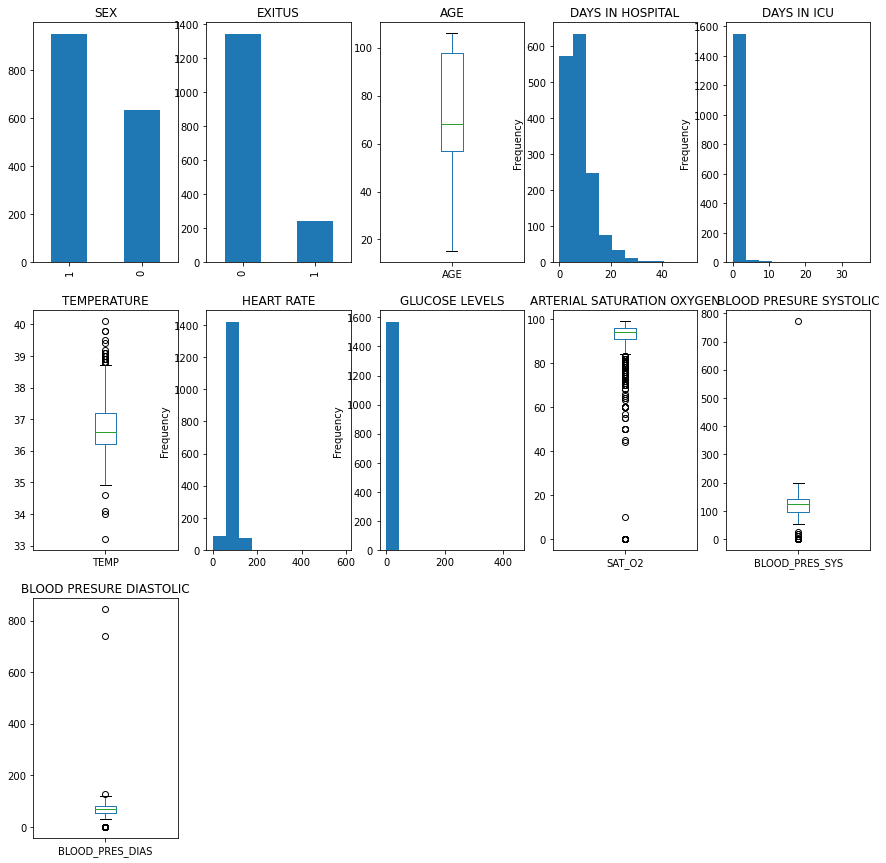

In [21]:
# Exploratory analysis of the data so far

# Distribution of the variables, univariate analysis
# Aqui comentarios respecto a la distribucion de cada variable haciendo hincapie en
# edad, exitus, dias en uci, dias en hospital, gluclosa, saturacion O2 y presion arterial (tanto sistolica como diastolica)
# Descartamos sexo, temperatura y latidos del corazon al ser poco relevantes

plt.figure(figsize=(15,15))

plt.subplot(3,5,1)
df_preprocessed['SEX'].value_counts().plot(kind="bar", title = 'SEX')

plt.subplot(3,5,2)
df_preprocessed["EXITUS"].value_counts().plot(kind="bar", title = 'EXITUS')

plt.subplot(3,5,3)
df_preprocessed['AGE'].plot(kind="box", title = 'AGE')

plt.subplot(3,5,4)
df_preprocessed['DAYS_HOSPITAL'].plot(kind="hist", title = 'DAYS IN HOSPITAL')

plt.subplot(3,5,5)
df_preprocessed['DAYS_ICU'].plot(kind="hist", title = 'DAYS IN ICU')

# detected outlier with temperature 0
plt.subplot(3,5,6)
df_preprocessed['TEMP'].plot(kind="box", title = 'TEMPERATURE')

plt.subplot(3,5,7)
df_preprocessed['HEART_RATE'].plot(kind="hist", title = 'HEART RATE')

plt.subplot(3,5,8)
df_preprocessed['GLUCOSE'].plot(kind="hist", title = 'GLUCOSE LEVELS')

plt.subplot(3,5,9)
df_preprocessed['SAT_O2'].plot(kind="box", title = 'ARTERIAL SATURATION OXYGEN')

plt.subplot(3,5,10)
df_preprocessed['BLOOD_PRES_SYS'].plot(kind="box", title = 'BLOOD PRESURE SYSTOLIC')

plt.subplot(3,5,11)
df_preprocessed['BLOOD_PRES_DIAS'].plot(kind="box", title = 'BLOOD PRESURE DIASTOLIC')

plt.show()


In [22]:
# Statistical values for each variable
# Aqui comentamos la gran desviacion tipica que presentan los valores clinicos, la tasa de exitus (a mayor mas mueren) y un poco
# los intervalos de edad
df_preprocessed.describe()


,SEX,EXITUS,AGE,DAYS_HOSPITAL,DAYS_ICU,TEMP,HEART_RATE,GLUCOSE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
count,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000
mean,0.599874,0.153749,71.106692,7.975425,0.284814,36.739445,87.560176,2.148708,90.700693,102.926906,59.639572
std,0.490078,0.360822,20.193249,5.506390,1.968744,0.820770,26.109250,22.839272,14.630351,59.923656,42.023712
min,0.000000,0.000000,15.000000,0.000000,0.000000,33.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,57.000000,4.000000,0.000000,36.200000,77.500000,0.000000,91.000000,95.500000,53.000000
50%,1.000000,0.000000,68.000000,7.000000,0.000000,36.600000,88.000000,0.000000,94.000000,123.000000,71.000000
75%,1.000000,0.000000,98.000000,10.000000,0.000000,37.200000,100.000000,0.000000,96.000000,141.000000,81.000000
max,1.000000,1.000000,106.000000,51.000000,36.000000,40.100000,593.000000,448.000000,99.000000,772.000000,845.000000


In [23]:
# Getting columns for future feature selecetion 
days_uci_col = df_preprocessed.pop('DAYS_ICU')

exitus_col = df_preprocessed.pop('EXITUS')

In [24]:
# Now we are going to perform a feature selection for icu days

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs_k_best_chi2 = SelectKBest(chi2, k=4)
fs_k_best_chi2.fit(df_preprocessed, days_uci_col)
col_filter = fs_k_best_chi2.get_support()
df_k_best_chi2_icu_days = df_preprocessed.iloc[:, col_filter]

print(df_k_best_chi2_icu_days)

      DAYS_HOSPITAL  GLUCOSE  BLOOD_PRES_SYS  BLOOD_PRES_DIAS
ID                                                           
1               4.0      0.0             0.0              0.0
2               4.0      0.0             0.0              0.0
3               7.0      0.0            85.0             47.0
4              10.0      0.0             0.0              0.0
5               4.0      0.0           111.0             70.0
...             ...      ...             ...              ...
2048            4.0      0.0           169.0             97.0
2049            5.0      0.0           143.0             63.0
2051            3.0      0.0             0.0              0.0
2052            6.0      0.0             0.0              0.0
2054            3.0      0.0             0.0              0.0

[1587 rows x 4 columns]


In [25]:
# Now we are going to perform a feature selection for exitus

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs_k_best_chi2 = SelectKBest(chi2, k=4)
fs_k_best_chi2.fit(df_preprocessed, exitus_col)
col_filter = fs_k_best_chi2.get_support()
df_k_best_chi2_existus = df_preprocessed.iloc[:, col_filter]

print(df_k_best_chi2_existus)

             AGE  GLUCOSE  SAT_O2  BLOOD_PRES_SYS
ID                                               
1      15.000000      0.0    92.0             0.0
2      18.000000      0.0    97.0             0.0
3      21.000000      0.0    95.0            85.0
4      21.000000      0.0    97.0             0.0
5      22.000000      0.0    92.0           111.0
...          ...      ...     ...             ...
2048  105.000000      0.0    98.0           169.0
2049  106.000000      0.0    98.0           143.0
2051   71.106692      0.0     0.0             0.0
2052   71.106692      0.0    98.0             0.0
2054   71.106692      0.0     0.0             0.0

[1587 rows x 4 columns]


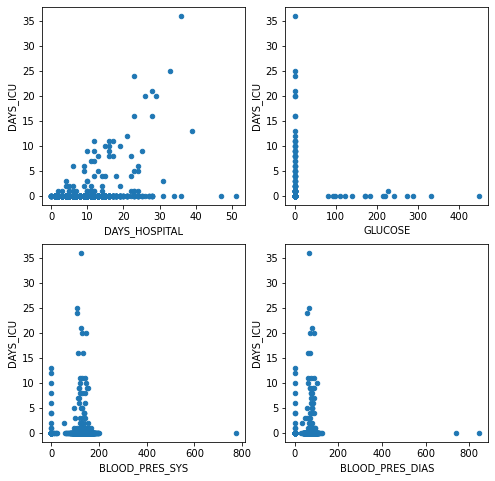

In [26]:
# Bivariate analysis based on the selected features for icu days

# observamos la correlacion entre dias en hospital y dias en uci y la debil correlacion con las demas variables
# nos parece indicar que hay cierta independencia entre ellas como luego se puede ver en el coeficiente de Pearson

df_preprocessed['DAYS_ICU'] = days_uci_col

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
df_preprocessed.plot(kind = "scatter", x = 'DAYS_HOSPITAL', y = 'DAYS_ICU', ax = plt.gca())

plt.subplot(2,2,2)
df_preprocessed.plot(kind = "scatter", x = 'GLUCOSE', y = 'DAYS_ICU', ax = plt.gca())

plt.subplot(2,2,3)
df_preprocessed.plot(kind = "scatter", x = 'BLOOD_PRES_SYS', y = 'DAYS_ICU', ax = plt.gca())

plt.subplot(2,2,4)
df_preprocessed.plot(kind = "scatter", x = 'BLOOD_PRES_DIAS', y = 'DAYS_ICU', ax = plt.gca())

plt.show()

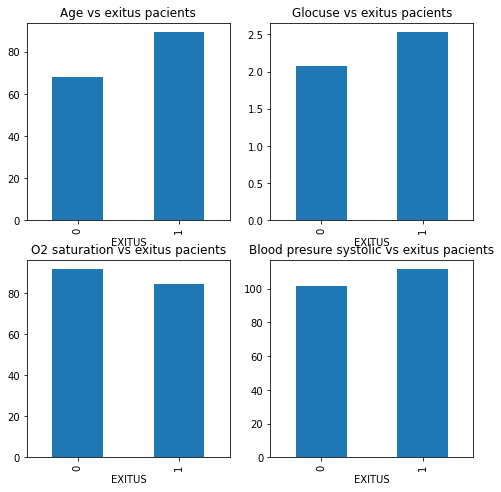

In [35]:
# Bivariate analysis based on the selected features for exitus

# aqui podemos obtener datos mas concluyentes repecto a la media de edad de los pacientes que mueren
# asi como la mayor tasas de glucosa
#

df_preprocessed['EXITUS'] = exitus_col

group_df = df_preprocessed.groupby(['EXITUS'])

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
group_df.mean()['AGE'].plot(kind = 'bar', title = 'Age vs exitus pacients')

plt.subplot(2,2,2)
group_df.mean()['GLUCOSE'].plot(kind = 'bar', title = 'Glocuse vs exitus pacients')

plt.subplot(2,2,3)
group_df.mean()['SAT_O2'].plot(kind = 'bar', title = 'O2 saturation vs exitus pacients')

plt.subplot(2,2,4)
group_df.mean()['BLOOD_PRES_SYS'].plot(kind = 'bar', title = 'Blood presure systolic vs exitus pacients')

plt.show()

In [40]:
df_preprocessed.to_csv('covid_preprocessed.csv', sep='\t', encoding='utf-8')

In [199]:
# Pearson correlation coeficients
print(df_preprocessed.corr(method = 'pearson'))

                      SEX       AGE  DAYS_HOSPITAL      TEMP  HEART_RATE  \
SEX              1.000000 -0.127009       0.080000  0.119206    0.025363   
AGE             -0.127009  1.000000       0.018655 -0.143929   -0.205502   
DAYS_HOSPITAL    0.080000  0.018655       1.000000  0.127630    0.007718   
TEMP             0.119206 -0.143929       0.127630  1.000000    0.135563   
HEART_RATE       0.025363 -0.205502       0.007718  0.135563    1.000000   
GLUCOSE          0.002334  0.008643      -0.009983 -0.013912   -0.009331   
SAT_O2          -0.022869 -0.054070      -0.088697 -0.043616    0.134493   
BLOOD_PRES_SYS   0.010490  0.126423       0.033332  0.076063    0.063978   
BLOOD_PRES_DIAS  0.014240  0.044170       0.041016  0.067387    0.101222   
DAYS_ICU         0.062642 -0.050063       0.350957  0.062654    0.037250   
EXITUS           0.037906  0.386208       0.002538 -0.011762   -0.022935   

                  GLUCOSE    SAT_O2  BLOOD_PRES_SYS  BLOOD_PRES_DIAS  \
SEX            

<AxesSubplot:xlabel='timeline'>

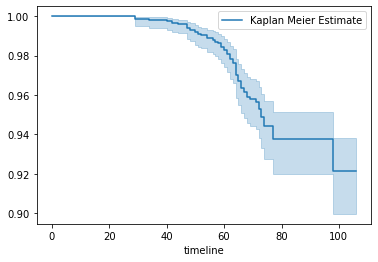

In [209]:
# Kaplan-Meier curve for ICU and AGE

# estan son las curvas que no se interpretar y que deberiamos indicar que no hemos sabido aplicarlas por desconocimiento

kmf = KaplanMeierFitter()

kmf.fit(df_preprocessed['AGE'], df_preprocessed['DAYS_ICU'],label='Kaplan Meier Estimate')

kmf.plot()

<AxesSubplot:xlabel='timeline'>

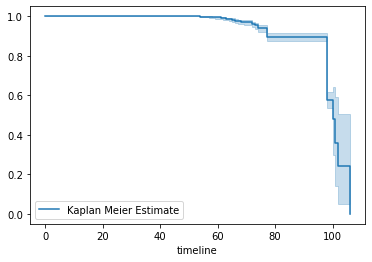

In [208]:
# Kaplan-Meier curve for EXITUS and AGE

kmf = KaplanMeierFitter()

kmf.fit(df_preprocessed['AGE'], df_preprocessed['EXITUS'],label='Kaplan Meier Estimate')

kmf.plot()